# Palmer Penguins
**Author: A. O'Connor**
**************
This notebook contains my own analysis of the Palmer Penguins dataset. Palmer Penguins is a famous data set available on [Github](https://allisonhorst.github.io/palmerpenguins/). It will be loaded into this notebook for data visualisation and exploration. It contains data from 344 penguins, collected at the Palmer Research Station in Antarctica. 
**************

### Import Libraries 
*************

In [1]:
import pandas as pd #The Pandas library will be used for interpretation and analysis of the data set
import matplotlib.pyplot as plt #The Matplotlib pyplot library will be used for plotting the data
import numpy as np #Numpy will be used to create arrays and perform manipulations of the numeric data in the data set
import seaborn as sb #Seaborn will be used to create a number of plots
import scipy #Scipy will be used to perform a linear regression and an independent samples t-test. 

### Load the data set
The Palmer Penguins data set will be loaded from [GitHub]("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"), using Pandas to read in the raw csv file. 
***************

In [2]:
# Load the penguins dataset using pandas read_csv() function
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## 1. Overview of the Data
Initially, view the the data frame and the summary statistics of the overall data set, to get an idea of the data that we'll be working with.
**********

In [3]:
# View the data frame
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
#Summary statistics of the data frame:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


**Information about the data frame**
**********
The Palmer Penguins data set contains 344 rows and 7 columns.\
These column contain various data types. 
- Variables in the columns bill length, bill depth, flipper length and body mass are all continuous numeric variables.
    -  The data is stored as the float data type, as they have multiple decimal places.
- Variables in the remaining columns, species, island and sex, are nominal, categorical variables.
    - These are stored as strings (e.g. sex can be "Male" or "Female".). In Pandas data frames, strings are by default stored as the object data type. 
- 2 values in the columns bill length, bill depth, flipper length and body mass and 1 value in the column sex are missing.



**Cleaning The Data**
*********
Using Pandas to drop the NaN or empty cells.\
From a Pandas tutorial on [W3 Schools.](https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)
**************

In [6]:
df_cleaned_empty_rows = df.dropna()

In [7]:
#Use the df.info() function to double check no null cells remain
df_cleaned_empty_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## 2. Exploratory Data Analysis
********
**Plotting the Data**
- The Pandas ```.plot``` function was used to plot a histogram of each of the numeric variables in the data frame, in order to visualise the data and get an overview of the distributions of these variables.
- Histograms are a good way to present continuous data, as they provide a visualisation of:
    - Where the distribution is centered
    - The spread of the distribution
    - The shape of the distribution  

<Axes: xlabel='Bill Length', ylabel='Frequency'>

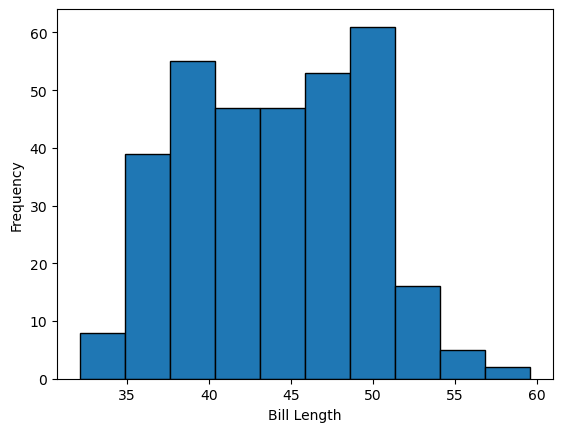

In [8]:
# Plot a histogram of the frequency distribution of the bill length variable using Pandas .plot()
df_cleaned_empty_rows["bill_length_mm"].plot(kind="hist", edgecolor = "black", xlabel = "Bill Length")

- The distribution of bill length is bimodal.

<Axes: xlabel='Bill Depth', ylabel='Frequency'>

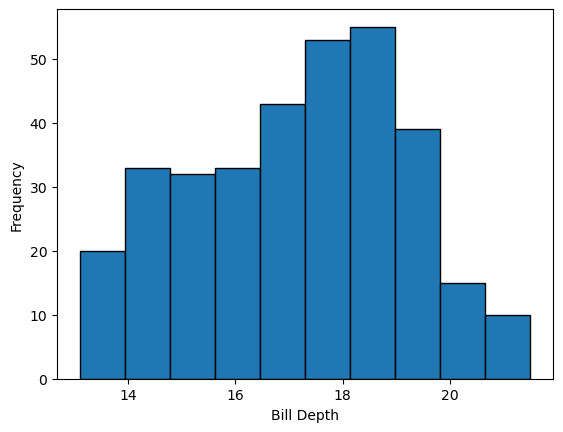

In [9]:
# Plot a histogram of the frequency distribution of the bill depth variable using Pandas .plot()
df_cleaned_empty_rows["bill_depth_mm"].plot(kind="hist", edgecolor = "black", xlabel = "Bill Depth")

- The distribution of bill depth is skewed left. 

<Axes: xlabel='Flipper Length', ylabel='Frequency'>

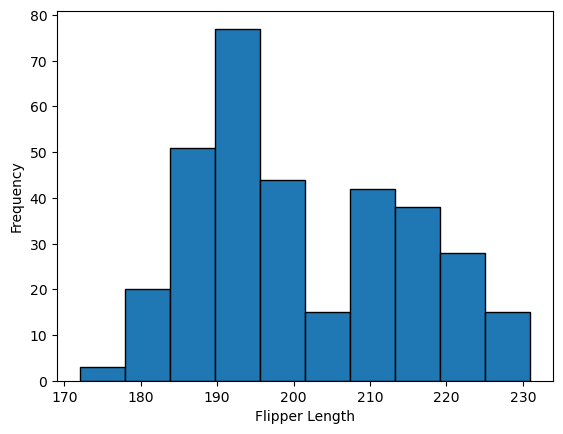

In [10]:
# Plot a histogram of the frequency distribution of the flipper length variable using Pandas .plot()
df_cleaned_empty_rows["flipper_length_mm"].plot(kind="hist", edgecolor = "black", xlabel = "Flipper Length")

- The distribution of flipper length is bimodal. 

<Axes: xlabel='Body Mass', ylabel='Frequency'>

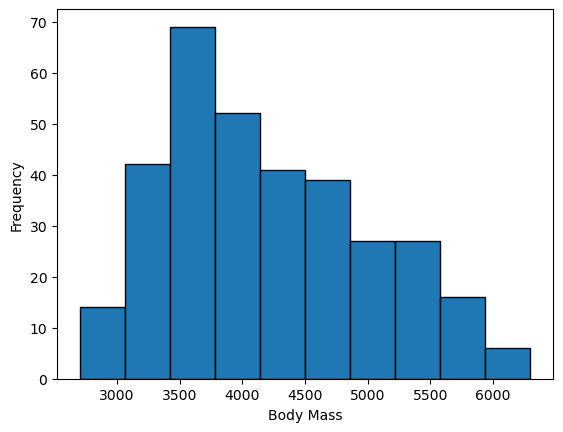

In [11]:
# Plot a histogram of the frequency distribution of the body mass variable using Pandas .plot()
df_cleaned_empty_rows["body_mass_g"].plot(kind="hist", edgecolor = "black", xlabel = "Body Mass")

- The distribution of body mass is skewed right.

**Plotting the Data**
- Matplotlib was used to plot bar charts of the data to compare penguin attributes by species. 
- Bar charts display a single data point (e.g. mean body mass) for a categorical variable (e.g. species). 

Text(0.5, 1.0, 'Body Mass by Species')

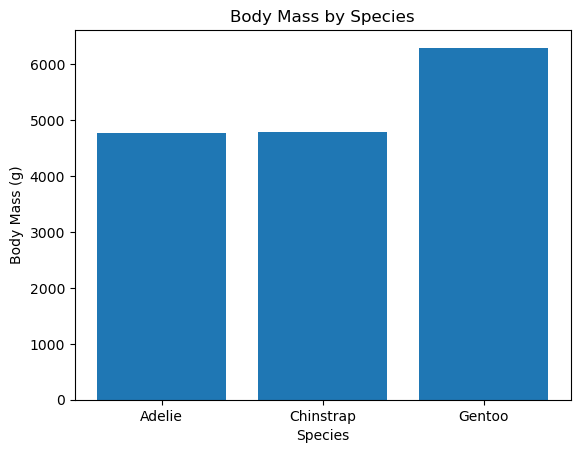

In [12]:
# Plot a bar chart to compare the mean body mass between the species using Matplotlib
fig, ax = plt.subplots()
ax.bar(
    x = df_cleaned_empty_rows["species"],
    height = df_cleaned_empty_rows["body_mass_g"]
)

ax.set_ylabel("Body Mass (g)")
ax.set_xlabel("Species")
ax.set_title("Body Mass by Species")

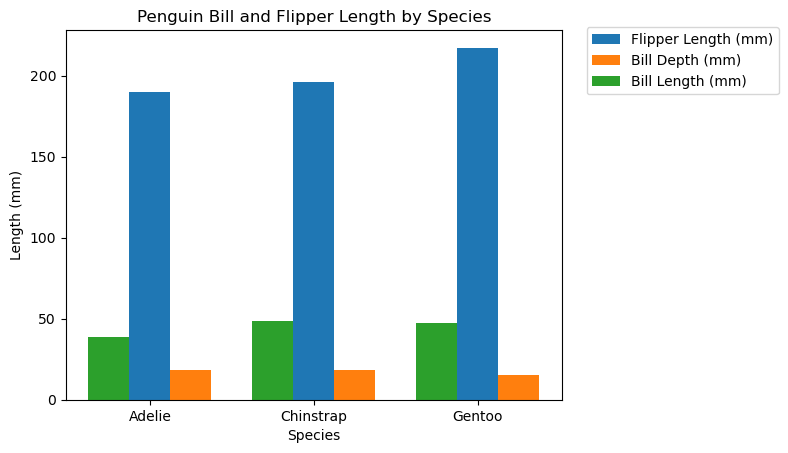

In [13]:
# Plot a bar chart of mean flipper length, bill depth and bill length between the species using Matplotlib
# Plot the three variables on the same bar chart

species = list(df_cleaned_empty_rows["species"].unique()) # returns a np array with the three species in the data frame
penguin_means = {
    "Bill Length": list(df_cleaned_empty_rows.groupby(["species"])["bill_length_mm"].mean()), # Returns a Pandas series with the 3 species group means, list wrappper so it can be called in the plot. 
    "Flipper Length": list(df_cleaned_empty_rows.groupby(["species"])["flipper_length_mm"].mean()),
    "Bill Depth": list(df_cleaned_empty_rows.groupby(["species"])["bill_depth_mm"].mean())
}

x = np.arange(len(species))  # returns a numpy array same length as the species list created earlier

fig, ax = plt.subplots()

#ax.bar(x, penguin_means["Bill Length"], width = 0.25, label="Bill Length") # Call the Bill Length list from the dict object for the height of the bars
ax.bar(x+0.25, penguin_means["Flipper Length"], width = 0.25, label = "Flipper Length (mm)") # x values offset by 0.25 (width of bar) so the bars are not on top of each other
ax.bar(x+0.50, penguin_means["Bill Depth"], width = 0.25, label = "Bill Depth (mm)")
ax.bar(x, penguin_means["Bill Length"], width = 0.25, label="Bill Length (mm)")

ax.set_ylabel('Length (mm)') #Label y axis 
ax.set_xlabel('Species') #Label x axis
ax.set_title('Penguin Bill and Flipper Length by Species') # Set title of bar chart 
ax.set_xticks(x + 0.25, species) # Labels and ticks on the x axis, offset by width of the bar so that the ticks sit in the middle 
fig.legend(loc = "upper right", bbox_to_anchor=(0.75, 0.4, 0.5, 0.5)) # Setting the location of the legend outside of the plot.

Text(0.5, 0, 'Species')

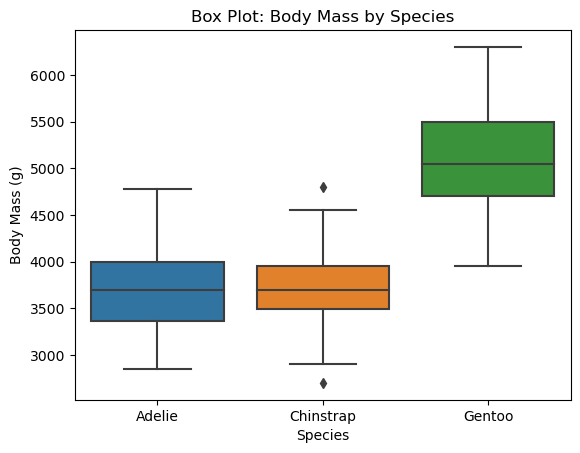

In [14]:
# Plotting a box plot of the above bar chart, body mass by species, using Seaborn 

ax = sb.boxplot(x="species", y="body_mass_g", data = df_cleaned_empty_rows)
ax.set_title("Box Plot: Body Mass by Species")
ax.set_ylabel("Body Mass (g)")
ax.set_xlabel("Species")

**Interpretation of Box Plot**
- Box plots are a useful plot to determine the spread of data within a group and identify potential outliers. 
- The boxes represent the interquartile range. The box limits represent the spread of the central 50% of the data. 
- The Gentoo species has the longest box, indicating a greater variance (or, wider spread) of the data points within the group. There is a wider spread of body masses within the Gentoo species of penguins. 
- The horizontal lines in the boxes are the median line. The group median for Adelie and Chinstrap are the same. There is a higher group median for Gentoo. 
- The whiskers extend to the furthest data point in the data set that is within $ \pm 1.5\times $ IQR. 
- Outliers are represented by points that fall outside the boxplot whiskers. Chinstrap species has two outliers, one penguin significantly smaller and one significantly larger than others of that species measured. 

## 3. Correlations
- Explore the correlations in the numeric data using Pandas ````.corr```` returns a correlation matrix of numeric columns. ([W3 Schools.](https://www.w3schools.com/python/pandas/pandas_correlations.asp))
**************

In [15]:
#Create a numeric data frame from the overall data frame using the function select_dtypes and specifying to include numeric columns. 
#Reference for this: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
df_numeric = df_cleaned_empty_rows.select_dtypes(include = ('number'))

In [16]:
df_numeric.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


********************
This correlation matrix describes the relationship between each numeric column in the data frame, represented as an R value ranging from -1 to +1.\
Negative numbers represent a negative correlation between the two variables (i.e. as one number increases the other decreases), and positive numbers represent a positive correlation. The closer the R value is to zero, the less strong the correlation. In the Palmer Penguibns data set, the following correlations are worth noting:
- Flipper length is positively correlated with bill depth, R value of 0.65.
- Body mass is also positively correlated with bill depth, though less strong a correlation with an R value of 0.59.
- The strongest correlation exists between body mass and flipper length, with an R value of 0.87. 
*************

c:\Users\oconnora\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


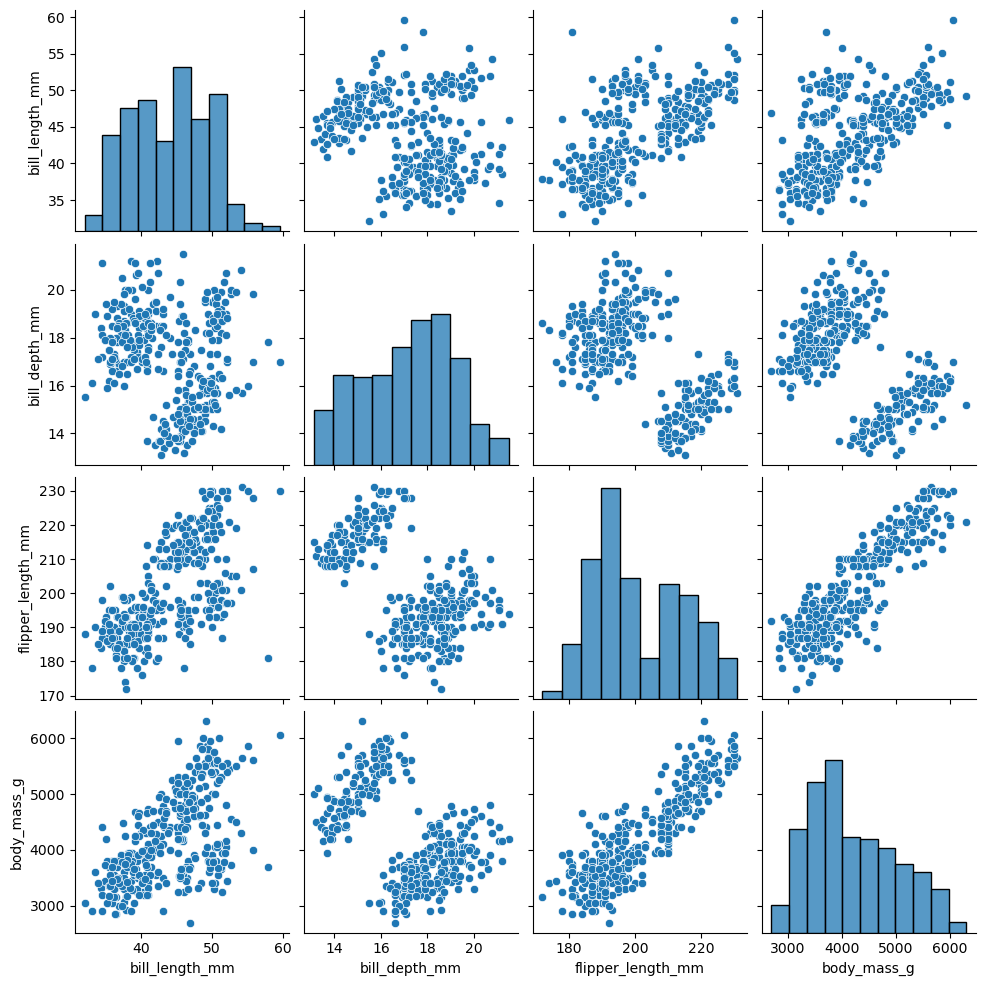

In [17]:
# Use Seaborn to visualise the correlations reported above
corr_pairplot = sb.pairplot(df_numeric)

### Body Mass vs Flipper Length: 
**Linear Regression**
***********
- Bivariate linear regression is used to analyse the relationship between two continuous numeric variables.
- Below, the correlation between body mass and flipper length in the Palmer Penguins data is explored using simple linear regression. 



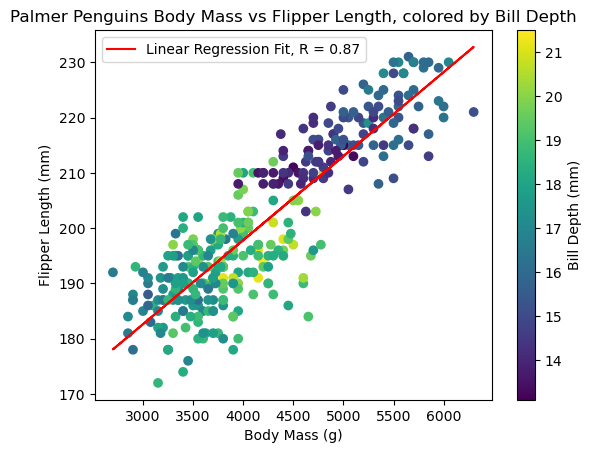

In [18]:
# Body Mass is positively correlated with Flipper length.

# Identify the best fit line, y = mx+c, for body mass vs flipper length
# Use Numpy's polyfit to do a least squares fit determine m and c

m, c = np.polyfit(
        x = df_cleaned_empty_rows["body_mass_g"], 
        y = df_cleaned_empty_rows["flipper_length_mm"], 
        deg = 1 #Degree of the polynomial 
                  ) 

fig, ax = plt.subplots() # subplot() creates two variables, a matplotlib figure and axis. Assign variable names ax and fig

# Plot a scatterplot of body mass vs flipper length  
scatterplot = ax.scatter(df_cleaned_empty_rows["body_mass_g"], df_cleaned_empty_rows["flipper_length_mm"], 
           c = df_cleaned_empty_rows["bill_depth_mm"], #color the scatterplot points by bill depth
           cmap = "viridis") # specify the color map 

# plot the least squares fit line identified in the numpy polyfit 
# x value will still be body mass, y value will be m*x + c
ax.plot(df_cleaned_empty_rows["body_mass_g"], m*df_cleaned_empty_rows["body_mass_g"]+c, c = "red", label = "Linear Regression Fit, R = 0.87")

ax.set_xlabel("Body Mass (g)")
ax.set_ylabel("Flipper Length (mm)")
ax.set_title("Palmer Penguins Body Mass vs Flipper Length, colored by Bill Depth")
fig.colorbar(scatterplot, label = "Bill Depth (mm)")
ax.legend()




In [19]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_cleaned_empty_rows["body_mass_g"], df_cleaned_empty_rows["flipper_length_mm"])
r_square = r_value**2

print(f"The observed significance probability for the regression fit of body mass and flipper length is {p_value}.\nThe R squared is {r_square}.")

The observed significance probability for the regression fit of body mass and flipper length is 3.1328362509741374e-105.
The R squared is 0.7620921573403904.


**Interpretation**
- The correlation coefficient of 0.87 indicates a strong positive correlation between body mass and flipper length. As body mass increases, flipper length increases.
- The R squared value of 0.76 indicates that 76% of the variation in flipper length can be attributed to body mass. 
- The p value of <0.05 can be considered evidence of a regression effect between the two variables. A significance probability of <0.05 indicates the correlation measured is legitimately present. 

### Body Mass vs Sex: 
**Students *t*-test**
*******************
- A students *t*-test is used to explore how the distribution of the response (e.g. body mass) differs across groups (sex). 
- Below, an Independent Two Samples t-test is used to determine if there is a correlation between body mass and sex through assessing whether differences in body mass between the two sexes are statistically significant. 

Text(0.5, 1.0, 'Boxplot of Penguin Body Mass by Sex')

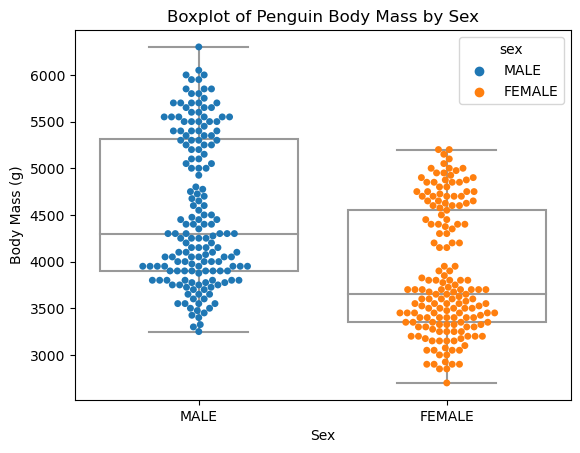

In [20]:
ax = sb.boxplot(x="sex", y="body_mass_g", data = df_cleaned_empty_rows, color ="white")
ax = sb.swarmplot(x="sex", y="body_mass_g", data = df_cleaned_empty_rows, hue = "sex")
ax.set_ylabel("Body Mass (g)")
ax.set_xlabel("Sex")
ax.set_title("Boxplot of Penguin Body Mass by Sex")


**Interpretation**
- The spread of body mass values in the male population is wider. There is a greater variance in the data points within the group. 
- There is less variance of body masses within the female penguin population. The data points within the group cluster closer to the group mean. 
- In both populations, the distribution is skewed toward the lower end of body masses. 
- The horizontal lines in the boxes are the median line. The group median for the male population is higher than the group median for the female population.  
- There are no outliers indicated in the box plot of body mass by species. No body masses lie outside the whisker limits of $ \pm 1.5\times $ IQR.

An **Independent Samples *t*-test** should be performed to determine the statistical significance of this difference in group means.

In [21]:
# Perform an independent t-test to determine if there is a statistically significant difference in the group means, using scipy
mean_body_mass_by_sex = df_cleaned_empty_rows.groupby(["sex"])["body_mass_g"].mean() #The mean of each group is required
std_body_mass_by_sex =   df_cleaned_empty_rows.groupby(["sex"])["body_mass_g"].std() #The standard deviation of each group is required 
count_by_sex = df_cleaned_empty_rows.groupby(["sex"])["body_mass_g"].count() #The no. of data points in each group is required


#Scipy will perform an indenpendent 2 sample t-test on the groups and return the calculated t statistics and the p-value
#The test performed assumes equal variances within the two groups
scipy.stats.ttest_ind_from_stats(mean1 = mean_body_mass_by_sex["FEMALE"], std1 = std_body_mass_by_sex["FEMALE"], nobs1 = count_by_sex["FEMALE"],
                                 mean2 = mean_body_mass_by_sex["MALE"], std2 = std_body_mass_by_sex["MALE"], nobs2 = count_by_sex["MALE"])

Ttest_indResult(statistic=-8.541720337994509, pvalue=4.8972467515964715e-16)

**Interpretation of the Independent Samples *t*-test**
- $\alpha$ = 0.05: This is the significance level. There is a 5% chance that the null hypothesis will be incorrectly accepted or rejected. 
- *p*-value $\le$ 0.05: A calculated significance probability less than the predetermined significance level indicates that the null hypothesis should be rejected in favour of the alternative hypothesis that there is a difference in the group means.   
- From the t-test performed, there is a statistically significant difference in body masses between the female and male populations on the palmer penguins. 

## Conclusion
The Palmer Penguins dataset contains size data gathered for three species of penguin in the Palmer Archipelago in Antarctica. The data set contains both continuous numeric variables, stored as floats, and nominal categorical variables, stored as strings. Plotting the numeric data on histograms revealed distinct distributions among the continuous variables, with bill length and flipper length displaying a bimodal pattern, while body mass skewed right and bill depth skewed left. Using bar charts to display the mean by species for each attribute showed Gentoo penguins had a higher mean body mass and flipper length compared to other species. A more in depth analysis of the correlations within the data set was then carried out. It was found that body mass was postively correlated with flipper length. This was supported by linear regression analysis that revelaed a highly significant relationship. The correlation between body mass and sex within the data set was also explored. A t-test was carried out that indicated a statistically significant difference in body masses between the male and female penguin populations. This analysis provides a deeper insight into the biology of the penguin population in the Palmer Archipelago in Antarctica. 

******************
## End